In [3]:


import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns
print(tf. __version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [16]:
img_width=299
img_height=299
batch_size=32
num_of_classes=17

TRAIN_DIR= "/kaggle/input/gemstones-polished/PolishedGemstoneTrain/train"
TEST_DIR= "/kaggle/input/gemstones-polished/PolishedGemstoneTrain/test"
VAL_DIR = "/kaggle/input/gemstones-polished/PolishedGemstoneTrain/val"

In [17]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    rescale=1./255,
                                    
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=False,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=False  )


val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))

test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


"""val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)"""

Found 6522 images belonging to 70 classes.
Found 1847 images belonging to 70 classes.
Found 1000 images belonging to 70 classes.


"val_gen=tf.keras.utils.image_dataset_from_directory(\n    VAL_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)\ntest_gen=tf.keras.utils.image_dataset_from_directory(\n    TEST_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)"

In [18]:
model=Sequential()
pretrained_model=tf.keras.applications.Xception(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = True


#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
#model.add(Flatten())
#model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(70, activation='softmax'))

"""model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(70, activation='softmax'))"""


model.compile(optimizer=Adam(learning_rate=0.00001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 70)                17990     
                                                                 
Total params: 21,174,766
Trainable params: 21,120,238


In [ ]:
ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=300,verbose=1,validation_data=val_gen,callbacks=ModelCallbacks )

Epoch 1/30
204/204 [==============================] - 216s 1s/step - loss: 2.5669 - accuracy: 0.9220 - val_loss: 3.2397 - val_accuracy: 0.7991
Epoch 2/30
204/204 [==============================] - 214s 1s/step - loss: 2.5377 - accuracy: 0.9252 - val_loss: 3.2206 - val_accuracy: 0.7975
Epoch 3/30
204/204 [==============================] - 215s 1s/step - loss: 2.5156 - accuracy: 0.9305 - val_loss: 3.1925 - val_accuracy: 0.8051
Epoch 4/30
204/204 [==============================] - 225s 1s/step - loss: 2.4893 - accuracy: 0.9330 - val_loss: 3.2153 - val_accuracy: 0.8045
Epoch 5/30
204/204 [==============================] - 213s 1s/step - loss: 2.4768 - accuracy: 0.9282 - val_loss: 3.1801 - val_accuracy: 0.7981
Epoch 6/30
204/204 [==============================] - 216s 1s/step - loss: 2.4432 - accuracy: 0.9348 - val_loss: 3.1785 - val_accuracy: 0.7959
Epoch 7/30
204/204 [==============================] - 216s 1s/step - loss: 2.4227 - accuracy: 0.9377 - val_loss: 3.1562 - val_accuracy: 0.8013

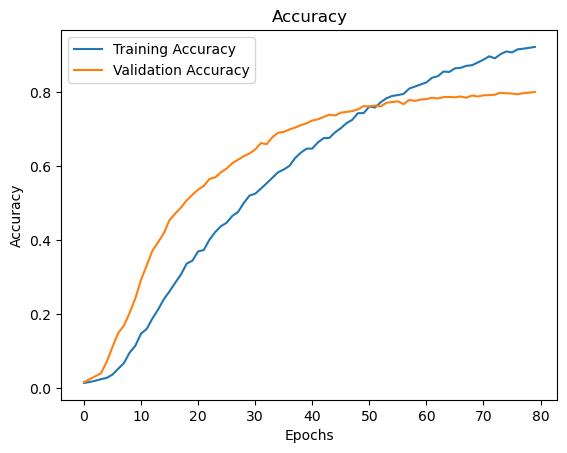

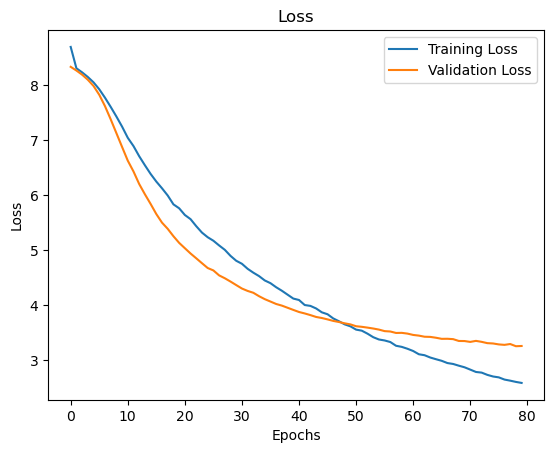

In [20]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate test data
32/32 [==============================] - 8s 248ms/step - loss: 3.3116 - accuracy: 0.7920
Test Loss: 3.3116183280944824
Test Accuracy: 0.7919999957084656


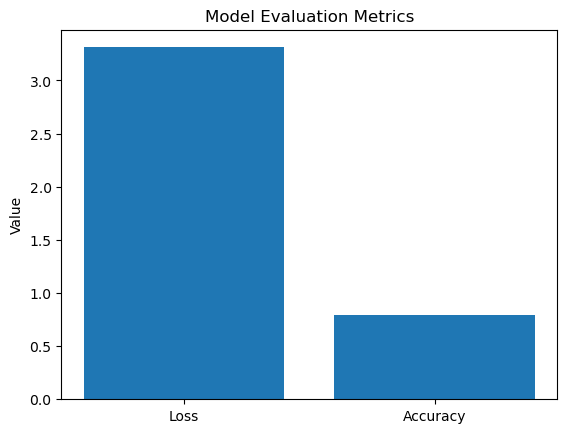

In [21]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [22]:
model.save('gem79%1.h5')
# Compute the confusion matrix

"""num_classes = val_gen.num_classes
y_train_true = val_gen.classes
y_train_pred_probs = model.predict(val_gen)
y_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)

train_cm = confusion_matrix(y_train_true, y_train_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()"""

'num_classes = val_gen.num_classes\ny_train_true = val_gen.classes\ny_train_pred_probs = model.predict(val_gen)\ny_train_pred_classes = np.argmax(y_train_pred_probs, axis=1)\n\ntrain_cm = confusion_matrix(y_train_true, y_train_pred_classes)\n\n# Plot the confusion matrix as a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", cbar=False)\nplt.title("Validation Confusion Matrix")\nplt.xlabel("Predicted Labels")\nplt.ylabel("True Labels")\nplt.show()'

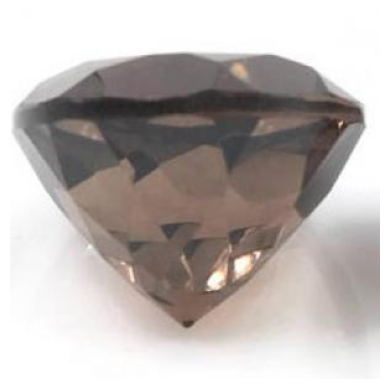

1/1 [==============================] - 1s 779ms/step
[[1.11484686e-02 7.78670460e-02 2.27416356e-04 1.18977611e-03
  2.75907340e-03 3.19716171e-03 4.13138978e-03 3.98724311e-04
  3.00290855e-03 3.21615371e-04 1.68770947e-03 4.77665802e-03
  9.49245994e-04 5.90000022e-03 1.41440413e-03 9.12020769e-05
  1.48238661e-03 1.21768193e-04 7.92305276e-04 3.48171405e-03
  6.27322006e-05 1.02014106e-03 1.54328052e-04 2.26373924e-03
  2.91740093e-02 1.24402486e-01 3.47076246e-04 5.00757247e-02
  3.58624384e-04 2.14189422e-04 1.35123897e-02 1.67572417e-03
  1.14376235e-04 5.23167253e-02 5.44116716e-04 1.37225041e-04
  2.52373214e-03 8.22875765e-04 8.17045686e-04 5.79848711e-04
  3.87716398e-04 6.68061431e-04 1.28400148e-04 2.58921791e-04
  2.03680322e-02 2.33000400e-03 5.66863600e-05 1.00101193e-03
  2.58335859e-01 8.37860256e-03 2.83882946e-01 1.34899936e-04
  4.83991951e-03 2.53730221e-03 1.47369035e-04 7.93972751e-04
  2.22952876e-04 1.72347820e-03 5.08065009e-03 3.85921507e-04
  3.56691075e-04 

In [31]:
classes=['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst','Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green',
         'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Cats Eye',
         'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine',
         'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite',
         'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli',
         'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx', 'Opal', 'Pearl', 'Peridot',
         'Pyrite', 'Pyrope', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire',
          'Serpentine', 'Sodalite', 'Spessartite',
         'Sphene','Sunstone', 'Tanzanite', 'Tigers Eye', 'Topaz', 'Tourmaline', 'Tsavorite',
         'Turquoise', 'Variscite', 'Zircon', 'Zoisite']

#model1 = tf.keras.models.load_model('gem79%1.h5')
label_dict = train_gen.class_indices
#print(label_dict)
img = tf.keras.preprocessing.image.load_img('/kaggle/input/gemstones-polished/PolishedGemstoneTrain/test/Quartz Smoky/Quartz Smoky__21.jpg',
                                            target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Rescale the image array
img_array = img_array / 255.0
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print(predictions[0][max_index])
print("The model is predicting this rock as:",classes[max_index])